In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib.animation as animation
import os

In [68]:
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Proyecto_Final/resultados/ex-psi-initial-norm2.csv"

outdir1 = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Proyecto_Final/resultados/cn.csv"

df1 = pd.read_csv(outdir)
position1 = df1[df1.columns[0]]
probability_density1 = df1[df1.columns[1]]

df2 = pd.read_csv(outdir1)
position2 = df2[df2.columns[0]]
probability_density2 = df2[df2.columns[1]]

relative_error = abs(probability_density2 - probability_density1) / abs(probability_density1)

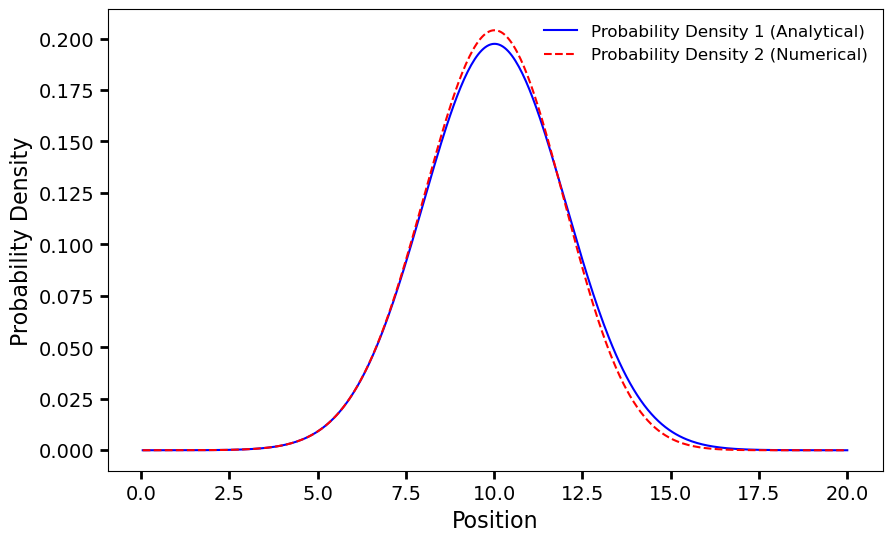

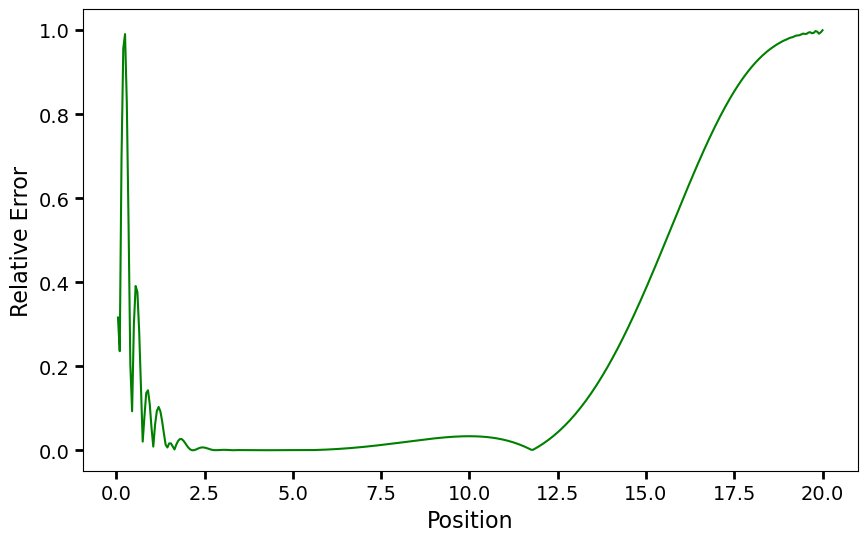

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(position1, probability_density1, label='Probability Density 1 (Analytical)', color='b')
plt.plot(position2, probability_density2, label='Probability Density 2 (Numerical)', linestyle='--', color='r')
plt.xlabel('Position', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.tick_params(axis='both', which='both', length=6, width=2, labelsize=14)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlabel('Position', fontsize=16)
plt.ylabel('Relative Error', fontsize=16)
plt.tick_params(axis='both', which='both', length=6, width=2, labelsize=14)
plt.plot(position1, relative_error, label='Relative Error', color='g')
plt.show()

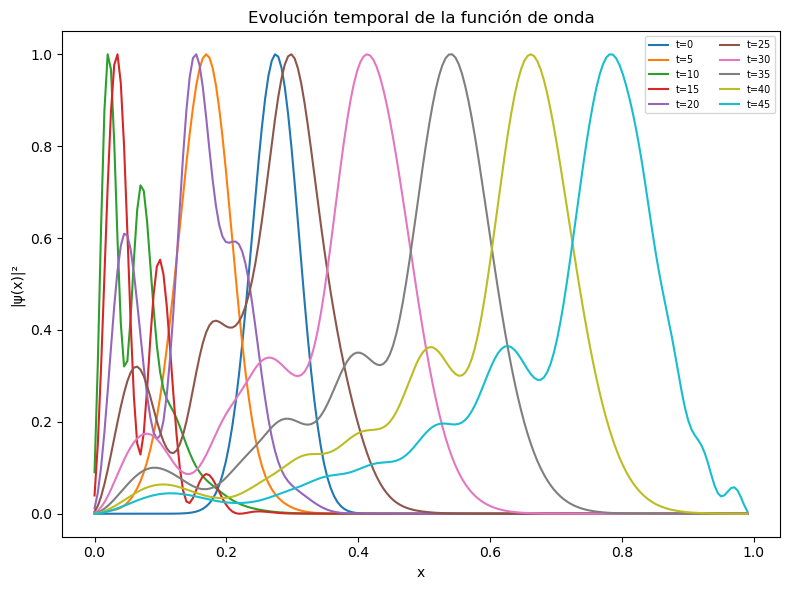

In [70]:
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Proyecto_Final/resultados"

# Buscar todos los archivos wave_*.dat
data_files = sorted(glob.glob(f"{outdir}/wave_*.dat"), key=os.path.getmtime)



# Graficar todos en una sola figura
plt.figure(figsize=(8, 6))

for filename in data_files:
    data = np.loadtxt(filename)  # Lee 2 columnas: x y |psi|^2
    x = data[:, 0]
    psi2 = data[:, 1]/max(data[:, 1])  # Normaliza para mejor visualización
    step = int(os.path.splitext(os.path.basename(filename))[0].split("_")[1])
    plt.plot(x, psi2, label=f"t={step}")

plt.xlabel("x")
plt.ylabel("|ψ(x)|²")
plt.title("Evolución temporal de la función de onda")
plt.legend(loc="upper right", fontsize=7, ncol=2)
plt.tight_layout()
plt.show()





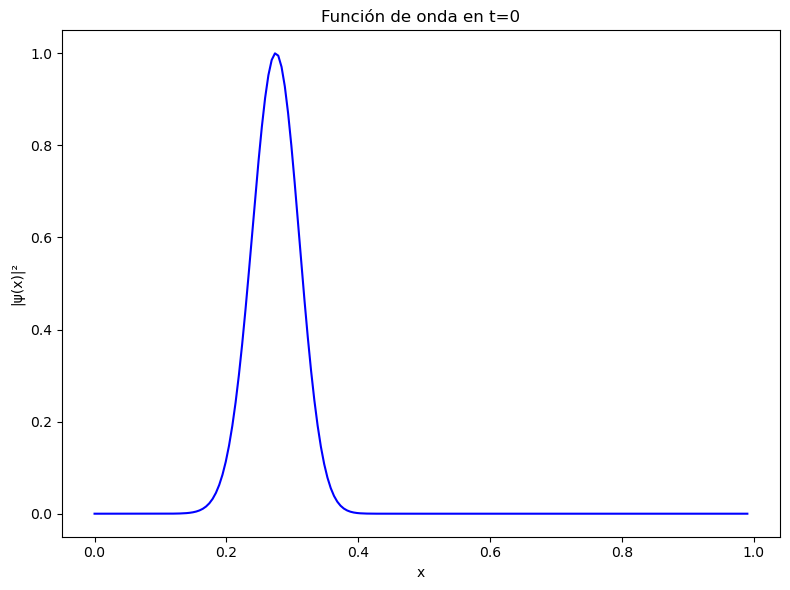

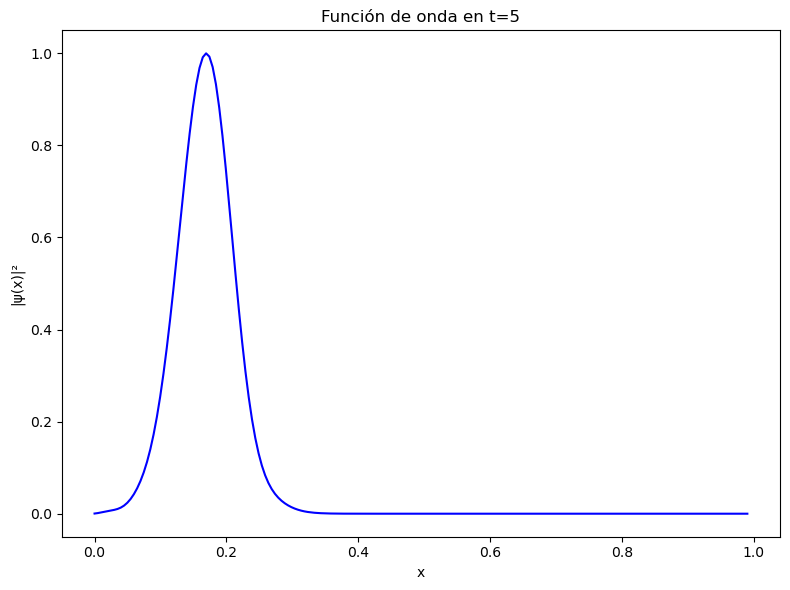

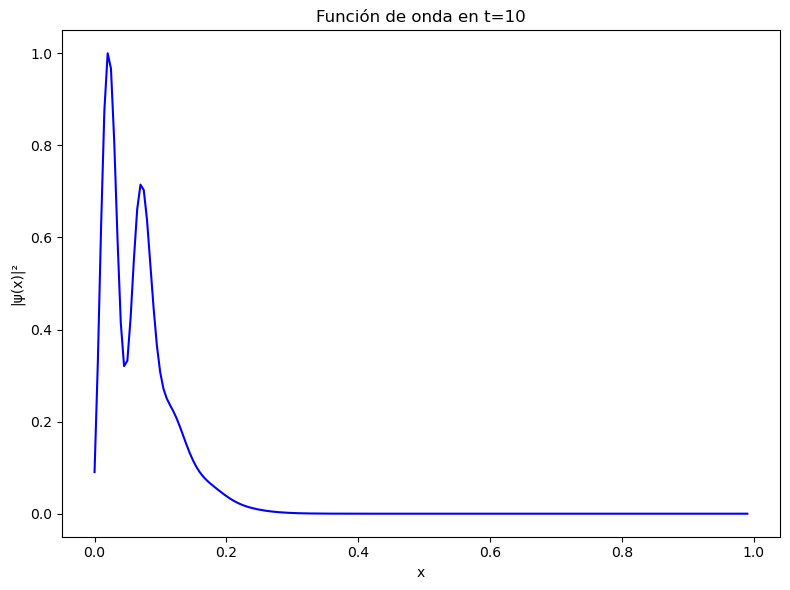

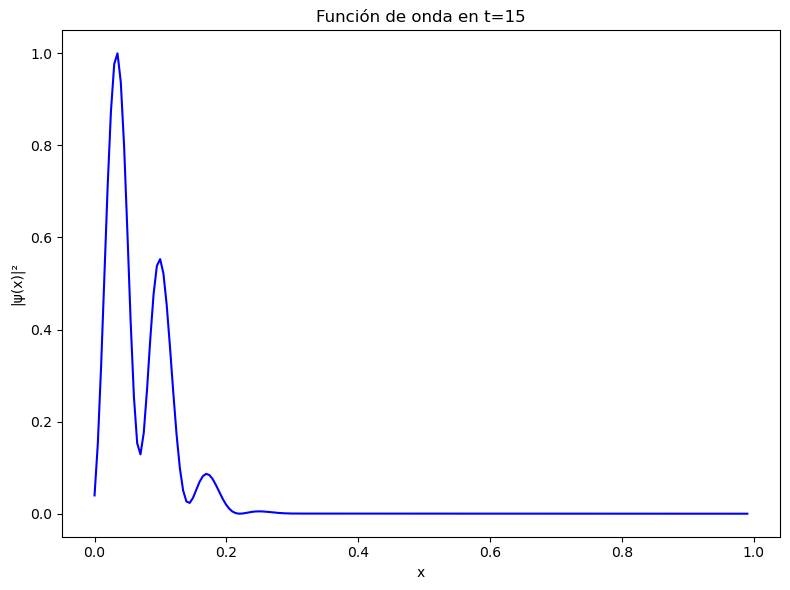

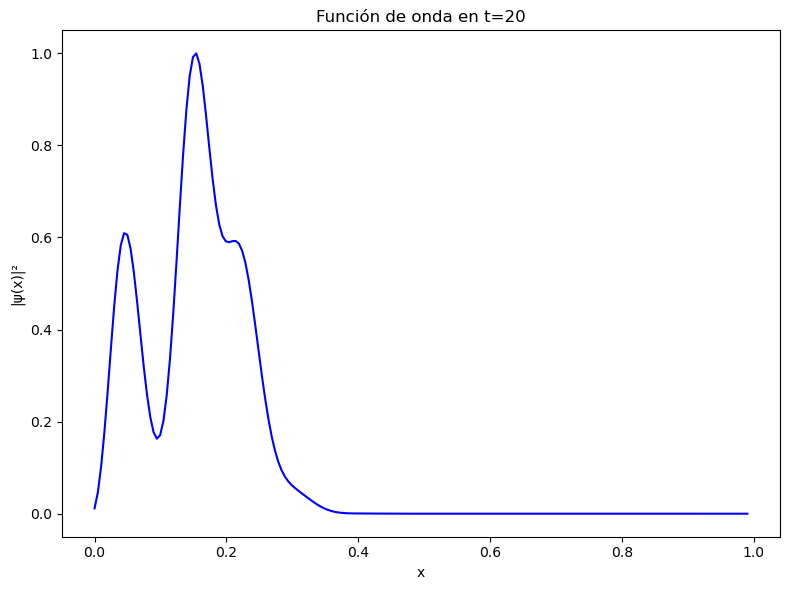

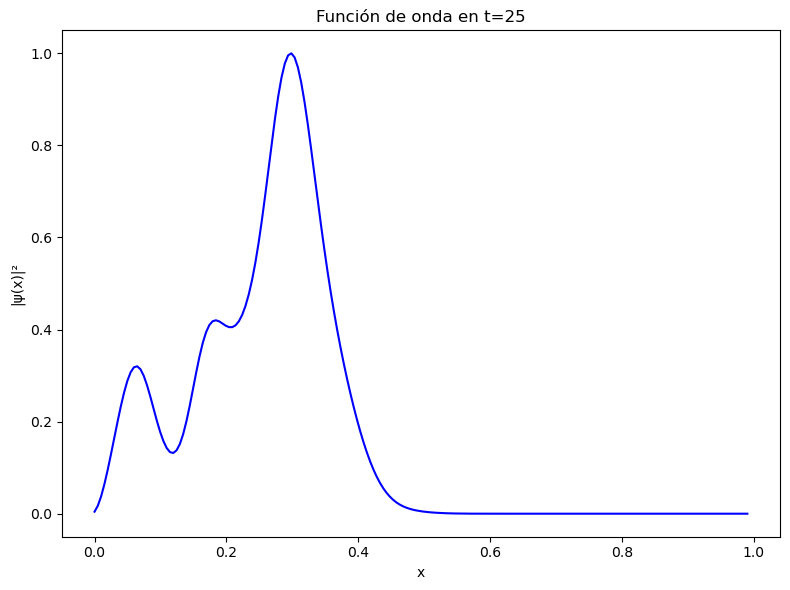

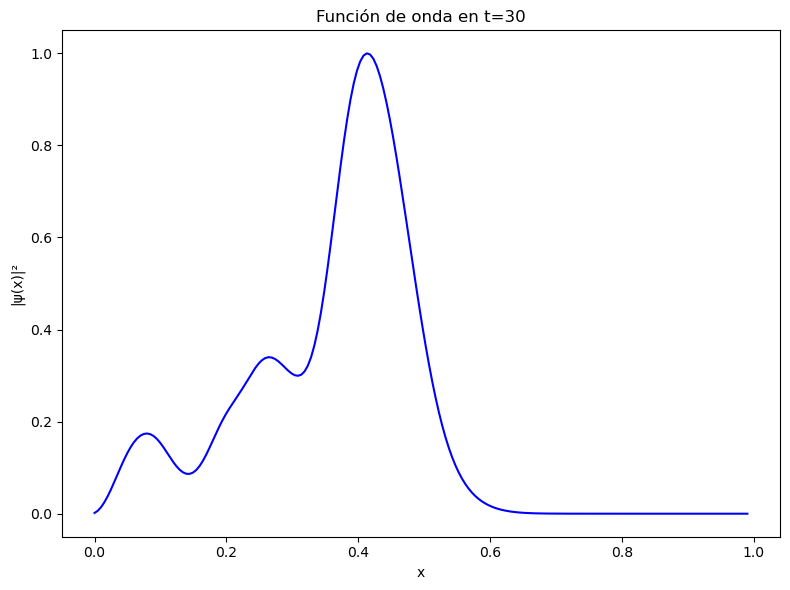

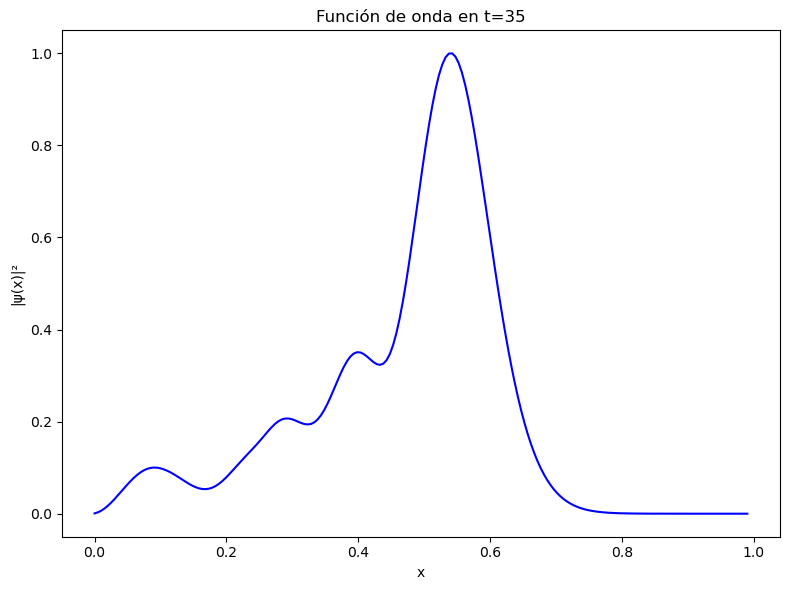

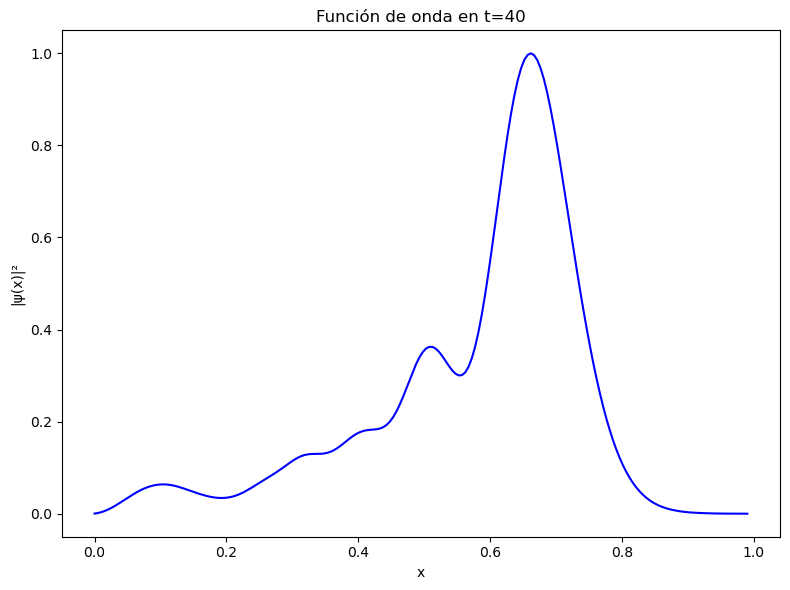

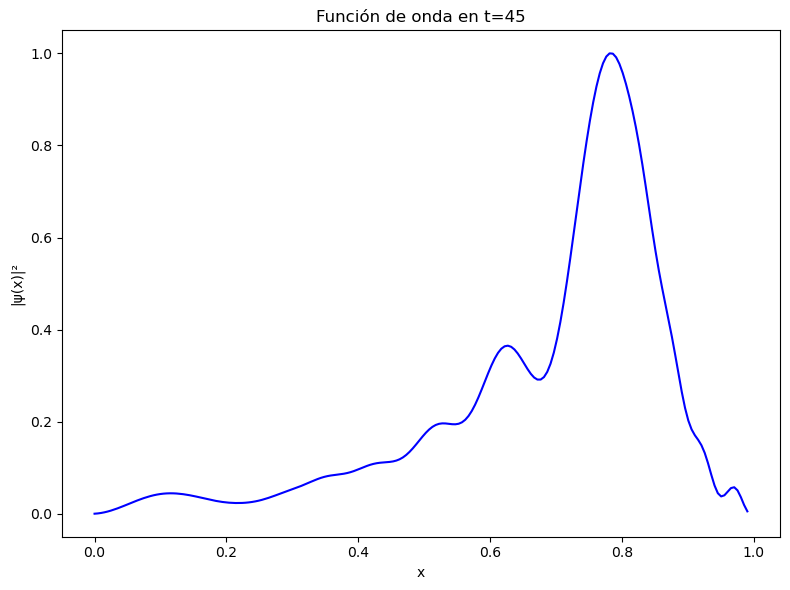

In [71]:
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Proyecto_Final/resultados"

# Buscar todos los archivos wave_*.dat y ordenarlos
data_files = sorted(glob.glob(f"{outdir}/wave_*.dat"), key=os.path.getmtime)



for filename in data_files:
    data = np.loadtxt(filename)
    x = data[:, 0]
    psi2 = data[:, 1] / max(data[:, 1])  # Normalizar
    
    step = int(os.path.splitext(os.path.basename(filename))[0].split("_")[1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, psi2, color="blue")
    plt.xlabel("x")
    plt.ylabel("|ψ(x)|²")
    plt.title(f"Función de onda en t={step}")
    plt.tight_layout()
    



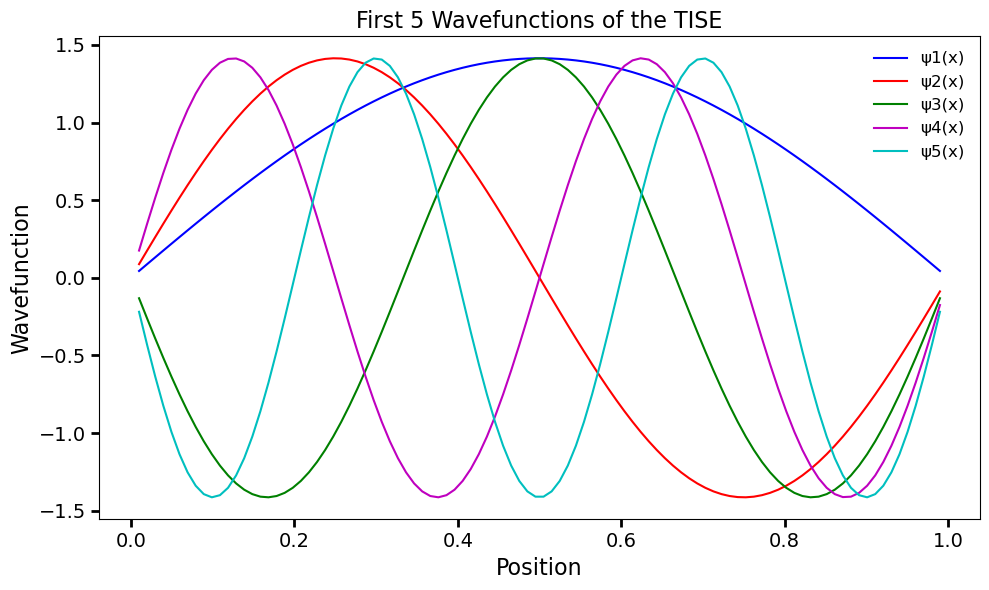

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Proyecto_Final/resultados/wavefunctions.dat"

# Leer datos con tabulador como separador
df = pd.read_csv(outdir, sep='\t', header=None)

# Columna de posiciones
x = df[0]

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar las 5 funciones de onda
colors = ['b', 'r', 'g', 'm', 'c']
for n in range(5):
    psi_n = df[n+1]
    plt.plot(x, psi_n, label=f'ψ{n+1}(x)', color=colors[n])

plt.xlabel('Position', fontsize=16)
plt.ylabel('Wavefunction', fontsize=16)
plt.title('First 5 Wavefunctions of the TISE', fontsize=16)
plt.tick_params(axis='both', which='both', length=6, width=2, labelsize=14)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.tight_layout()
plt.show()



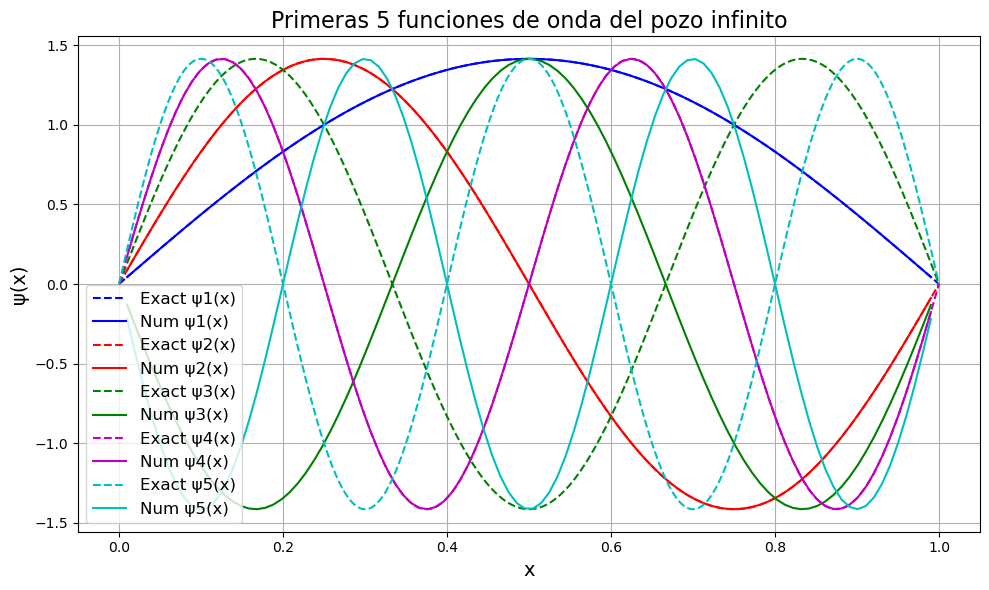

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parámetros ---
L = 1.0        # Largo del pozo
n_max = 5      # Número de funciones de onda a graficar

# --- Solución exacta ---
def psi_exact(n, x, L):
    """Función de onda exacta del pozo infinito."""
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

# --- Leer resultados numéricos ---
df = pd.read_csv(outdir, sep='\t', header=None)
x_num = df[df.columns[0]]
psi_num = [df[df.columns[i+1]] for i in range(n_max)]

# --- Crear figura ---
plt.figure(figsize=(10,6))

colors = ['b', 'r', 'g', 'm', 'c']

for n in range(1, n_max+1):
    # Solución exacta
    x_exact = np.linspace(0, L, 500)
    y_exact = psi_exact(n, x_exact, L)
    plt.plot(x_exact, y_exact, color=colors[n-1], linestyle='--', label=f'Exact ψ{n}(x)')

    # Solución numérica
    plt.plot(x_num, psi_num[n-1], color=colors[n-1], linestyle='-', label=f'Num ψ{n}(x)')

plt.xlabel("x", fontsize=14)
plt.ylabel("ψ(x)", fontsize=14)
plt.title("Primeras 5 funciones de onda del pozo infinito", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


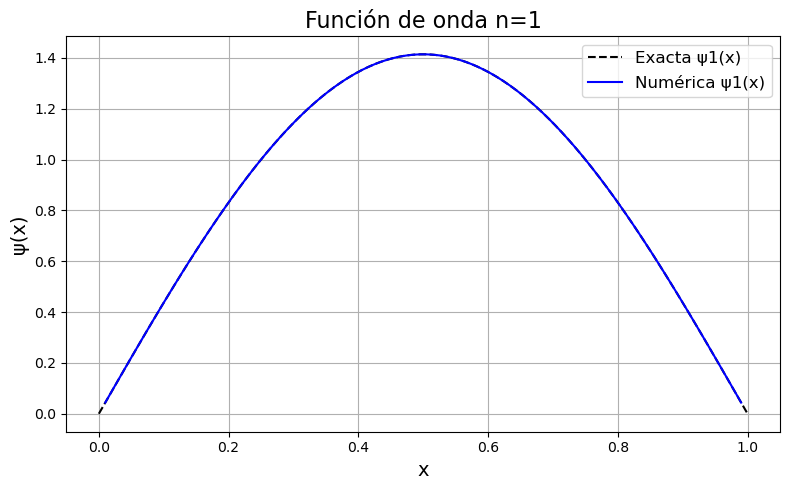

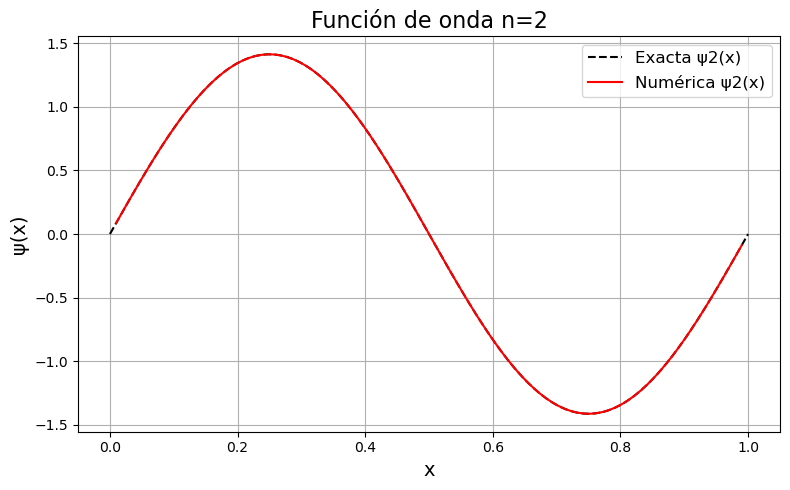

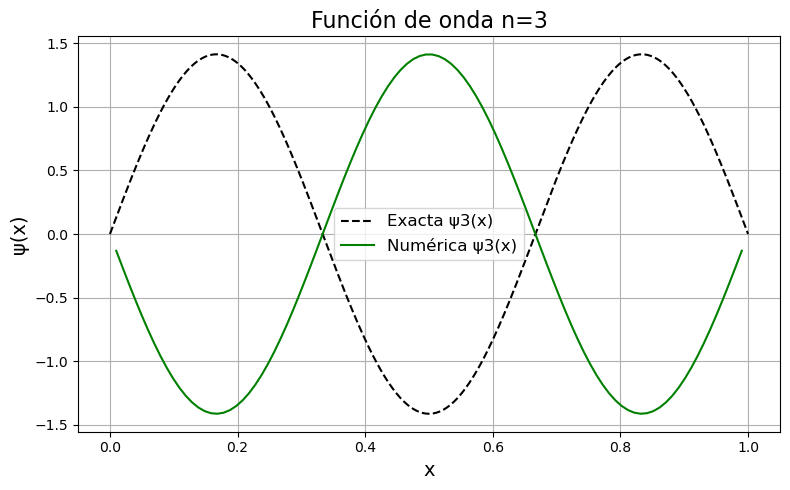

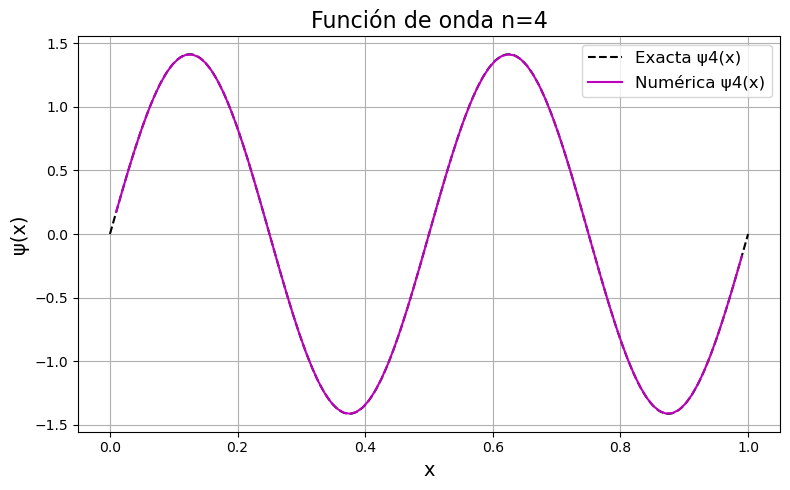

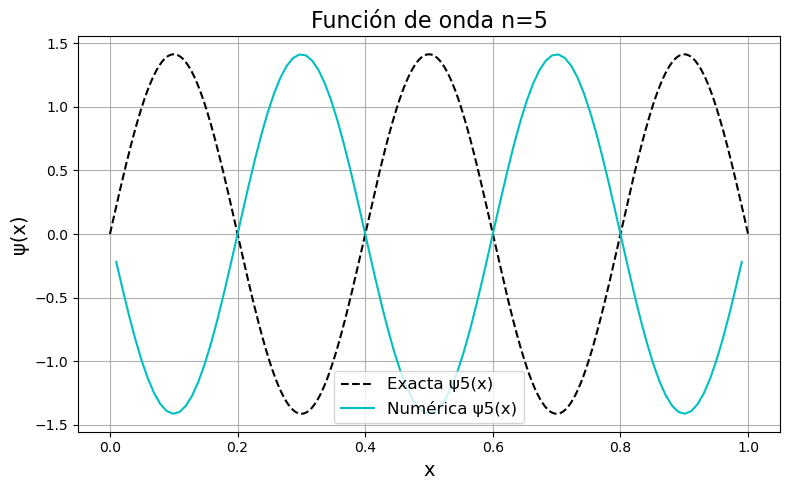

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ruta del archivo
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Proyecto_Final/resultados/wavefunctions.dat" 

# --- Parámetros ---
L = 1.0        # Largo del pozo
n_max = 5      # Número de funciones de onda a graficar

# --- Solución exacta ---
def psi_exact(n, x, L):
    """Función de onda exacta del pozo infinito."""
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

# --- Leer resultados numéricos 
df = pd.read_csv(outdir, sep='\t', header=None)
x_num = df[df.columns[0]]
psi_num = [df[df.columns[i+1]] for i in range(n_max)]

colors = ['b', 'r', 'g', 'm', 'c']

# --- Graficar cada función de onda por separado ---
for n in range(1, n_max+1):
    plt.figure(figsize=(8,5))
    
    # Solución exacta
    x_exact = np.linspace(0, L, 500)
    y_exact = psi_exact(n, x_exact, L)
    plt.plot(x_exact, y_exact, color='k', linestyle='--', label=f'Exacta ψ{n}(x)')
    
    # Solución numérica
    plt.plot(x_num, psi_num[n-1], color=colors[n-1], linestyle='-', label=f'Numérica ψ{n}(x)')
    
    plt.xlabel("x", fontsize=14)
    plt.ylabel("ψ(x)", fontsize=14)
    plt.title(f"Función de onda n={n}", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
